In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd
import qutip as qutip
from scipy.stats import norm
from scipy.optimize import minimize

In [2]:
data = np.loadtxt("esb_process_tomography_20230108.txt")

In [3]:
data

array([[0.00000000e+00, 1.54900000e+03, 1.67322235e+09, ...,
        8.92198659e-05, 2.61644629e-04, 1.25910912e-04],
       [0.00000000e+00, 1.54900000e+03, 1.67322235e+09, ...,
        8.69371215e-05, 2.20238828e-04, 1.21631521e-04],
       [0.00000000e+00, 1.54900000e+03, 1.67322235e+09, ...,
        9.56014046e-05, 2.35347456e-04, 1.20626311e-04],
       ...,
       [0.00000000e+00, 1.55000000e+03, 1.67322417e+09, ...,
        9.69191969e-05, 1.83476121e-04, 1.47931278e-04],
       [0.00000000e+00, 1.55000000e+03, 1.67322417e+09, ...,
        9.47802982e-05, 2.17445631e-04, 1.46999635e-04],
       [0.00000000e+00, 1.55000000e+03, 1.67322417e+09, ...,
        9.79227625e-05, 2.12661340e-04, 1.49464933e-04]])

In [4]:
time_h_1549 = []
time_h_1549_2 = []
time_h_1549_4 = []
time_h_1549_6 = []
time_h_1549_8 = []
time_h_1550 = []
time_d_1549 = []
time_d_1549_2 = []
time_d_1549_4 = []
time_d_1549_6 = []
time_d_1549_8 = []
time_d_1550 = []

In [5]:
vh_h_1549 = []
vh_h_1549_2 = []
vh_h_1549_4 = []
vh_h_1549_6 = []
vh_h_1549_8 = []
vh_h_1550 = []
vh_d_1549 = []
vh_d_1549_2 = []
vh_d_1549_4 = []
vh_d_1549_6 = []
vh_d_1549_8 = []
vh_d_1550 = []

In [6]:
da_h_1549 = []
da_h_1549_2 = []
da_h_1549_4 = []
da_h_1549_6 = []
da_h_1549_8 = []
da_h_1550 = []
da_d_1549 = []
da_d_1549_2 = []
da_d_1549_4 = []
da_d_1549_6 = []
da_d_1549_8 = []
da_d_1550 = []

In [7]:
pd_h_1549 = []
pd_h_1549_2 = []
pd_h_1549_4 = []
pd_h_1549_6 = []
pd_h_1549_8 = []
pd_h_1550 = []
pd_d_1549 = []
pd_d_1549_2 = []
pd_d_1549_4 = []
pd_d_1549_6 = []
pd_d_1549_8 = []
pd_d_1550 = []

In [8]:
pa_h_1549 = []
pa_h_1549_2 = []
pa_h_1549_4 = []
pa_h_1549_6 = []
pa_h_1549_8 = []
pa_h_1550 = []
pa_d_1549 = []
pa_d_1549_2 = []
pa_d_1549_4 = []
pa_d_1549_6 = []
pa_d_1549_8 = []
pa_d_1550 = []

In [9]:
def extract_data(lh,ld,lt,la,ldp,d):
    vh = d[4]/(13.47*d[3]/9)
    pd = d[5]/(d[6]+d[5])
    pa = d[6]/(d[6]+d[5])
    lt.append(datetime.datetime.fromtimestamp(d[2]))
    lh.append(vh)
    ld.append((pd-pa)/(np.sin(2*np.arctan(vh))))
    ldp.append(pd)
    la.append(pa)

In [10]:
for i,d in enumerate(data):
    if d[0] == 0:
        if d[1] == 1549:
            extract_data(vh_h_1549,da_h_1549,time_h_1549,pa_h_1549,pd_h_1549,d)
        if d[1] == 1549.5:
            extract_data(vh_h_1549_2,da_h_1549_2,time_h_1549_2,pa_h_1549_2,pd_h_1549_2,d)
        if d[1] == 1549.9:
            extract_data(vh_h_1549_4,da_h_1549_4,time_h_1549_4,pa_h_1549_4,pd_h_1549_4,d)
        if d[1] == 1549.99:
            extract_data(vh_h_1549_6,da_h_1549_6,time_h_1549_6,pa_h_1549_6,pd_h_1549_6,d)
        if d[1] == 1549.999:
            extract_data(vh_h_1549_8,da_h_1549_8,time_h_1549_8,pa_h_1549_8,pd_h_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_h_1550,da_h_1550,time_h_1550,pa_h_1550,pd_h_1550,d)
    if d[0] == 1:
        if d[1] == 1549:
            extract_data(vh_d_1549,da_d_1549,time_d_1549,pa_d_1549,pd_d_1549,d)
        if d[1] == 1549.5:
            extract_data(vh_d_1549_2,da_d_1549_2,time_d_1549_2,pa_d_1549_2,pd_d_1549_2,d)
        if d[1] == 1549.9:
            extract_data(vh_d_1549_4,da_d_1549_4,time_d_1549_4,pa_d_1549_4,pd_d_1549_4,d)
        if d[1] == 1549.99:
            extract_data(vh_d_1549_6,da_d_1549_6,time_d_1549_6,pa_d_1549_6,pd_d_1549_6,d)
        if d[1] == 1549.999:
            extract_data(vh_d_1549_8,da_d_1549_8,time_d_1549_8,pa_d_1549_8,pd_d_1549_8,d)
        if d[1] == 1550:
            extract_data(vh_d_1550,da_d_1550,time_d_1550,pa_d_1550,pd_d_1550,d)

Text(0.5, 1.0, 'Rantoul Loop VH Polarization')

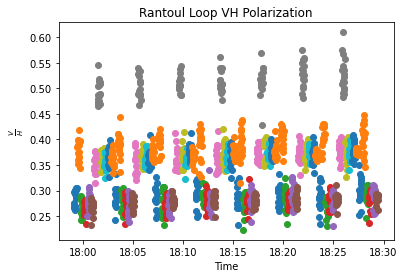

In [11]:
fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.plot(time_h_1549,vh_h_1549,label='H 1549',ls='',marker='o')
ax.plot(time_h_1549_2,vh_h_1549_2,label='H 1549.5',ls='',marker='o')
ax.plot(time_h_1549_4,vh_h_1549_4,label='H 1549.9',ls='',marker='o')
ax.plot(time_h_1549_6,vh_h_1549_6,label='H 1549.99',ls='',marker='o')
ax.plot(time_h_1549_8,vh_h_1549_8,label='H 1549.999',ls='',marker='o')
ax.plot(time_h_1550,vh_h_1550,label='H 1550',ls='',marker='o')
ax.plot(time_d_1549,vh_d_1549,label='D 1549',ls='',marker='o')
ax.plot(time_d_1549_2,vh_d_1549_2,label='D 1549.5',ls='',marker='o')
ax.plot(time_d_1549_4,vh_d_1549_4,label='D 1549.9',ls='',marker='o')
ax.plot(time_d_1549_6,vh_d_1549_6,label='D 1549.99',ls='',marker='o')
ax.plot(time_d_1549_8,vh_d_1549_8,label='D 1549.999',ls='',marker='o')
ax.plot(time_d_1550,vh_d_1550,label='D 1550',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
#ax.set_ylim(bottom=-1,top=100)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")

NameError: name 'time_h' is not defined

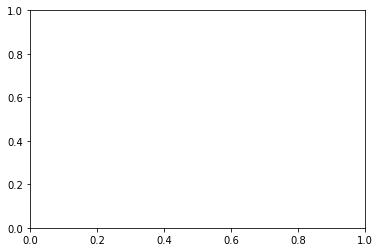

In [12]:
fig, ax = plt.subplots()
num_points = 1000
ax.plot(time_h[:num_points],vh_h[:num_points],label='H',ls='',marker='o')
ax.plot(time_d[:num_points],vh_d[:num_points],label='D',ls='',marker='o')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\frac{V}{H}$")
ax.set_ylim(bottom=1,top=20)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(loc=1)

In [32]:
avg_vh_h_1549 = np.mean(np.array(vh_h_1549[:-9]).reshape(-1, 16), axis=1)
avg_vh_h_1549_2 = np.mean(np.array(vh_h_1549_2[:-8]).reshape(-1, 16), axis=1)
avg_vh_h_1549_4 = np.mean(np.array(vh_h_1549_4[:-10]).reshape(-1, 16), axis=1)
avg_vh_h_1549_6 = np.mean(np.array(vh_h_1549_6[:-12]).reshape(-1, 16), axis=1)
avg_vh_h_1549_8 = np.mean(np.array(vh_h_1549_8[:-10]).reshape(-1, 16), axis=1)
avg_vh_h_1550 = np.mean(np.array(vh_h_1550[:-8]).reshape(-1, 16), axis=1)
avg_vh_d_1549 = np.mean(np.array(vh_d_1549[:-10]).reshape(-1, 16), axis=1)
avg_vh_d_1549_2 = np.mean(np.array(vh_d_1549_2[:-9]).reshape(-1, 16), axis=1)
avg_vh_d_1549_4 = np.mean(np.array(vh_d_1549_4[:-9]).reshape(-1, 16), axis=1)
avg_vh_d_1549_6 = np.mean(np.array(vh_d_1549_6[:-10]).reshape(-1, 16), axis=1)
avg_vh_d_1549_8 = np.mean(np.array(vh_d_1549_8[:-9]).reshape(-1, 16), axis=1)
avg_vh_d_1550 = np.mean(np.array(vh_d_1550[:-8]).reshape(-1, 16), axis=1)

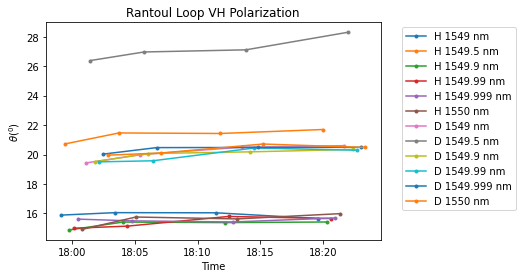

In [35]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
ax.plot(time_d_1549[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

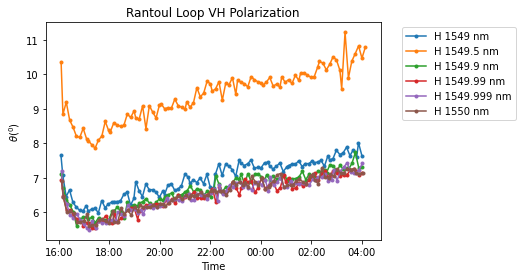

In [150]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

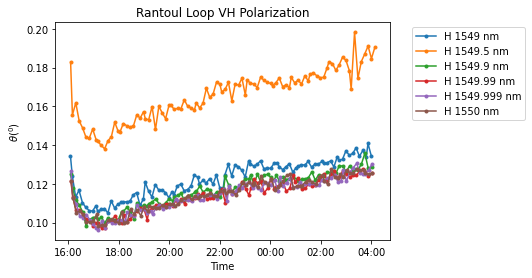

In [151]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_vh_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2],avg_vh_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],avg_vh_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_vh_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_vh_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_vh_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

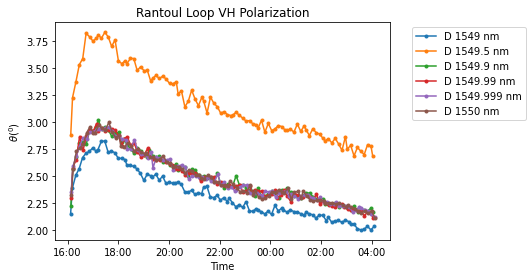

In [152]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arctan(avg_vh_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2][:-1],np.degrees(np.arctan(avg_vh_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop VH Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

In [36]:
avg_da_h_1549 = np.mean(np.array(da_h_1549[:-9]).reshape(-1, 16), axis=1)
avg_da_h_1549_2 = np.mean(np.array(da_h_1549_2[:-8]).reshape(-1, 16), axis=1)
avg_da_h_1549_4 = np.mean(np.array(da_h_1549_4[:-10]).reshape(-1, 16), axis=1)
avg_da_h_1549_6 = np.mean(np.array(da_h_1549_6[:-12]).reshape(-1, 16), axis=1)
avg_da_h_1549_8 = np.mean(np.array(da_h_1549_8[:-10]).reshape(-1, 16), axis=1)
avg_da_h_1550 = np.mean(np.array(da_h_1550[:-8]).reshape(-1, 16), axis=1)
avg_da_d_1549 = np.mean(np.array(da_d_1549[:-10]).reshape(-1, 16), axis=1)
avg_da_d_1549_2 = np.mean(np.array(da_d_1549_2[:-9]).reshape(-1, 16), axis=1)
avg_da_d_1549_4 = np.mean(np.array(da_d_1549_4[:-9]).reshape(-1, 16), axis=1)
avg_da_d_1549_6 = np.mean(np.array(da_d_1549_6[:-10]).reshape(-1, 16), axis=1)
avg_da_d_1549_8 = np.mean(np.array(da_d_1549_8[:-9]).reshape(-1, 16), axis=1)
avg_da_d_1550 = np.mean(np.array(da_d_1550[:-8]).reshape(-1, 16), axis=1)

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in arccos
  # Remove the CWD from sys.path while we load stuff.
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arccos
  # This is added back by InteractiveShellApp.init_path()
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arccos
  if sys.path[0] == '':
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in arccos
  del sys.path[0]
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in arccos
  

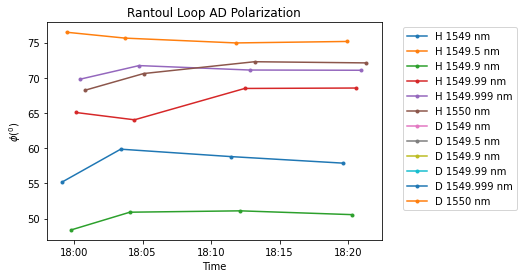

In [38]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
ax.plot(time_d_1549[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  


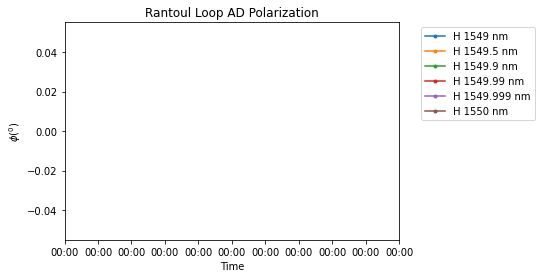

In [155]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549[:num_points][::2])),label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2],np.degrees(np.arccos(avg_da_h_1549_2[:num_points][::2])),label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_4[:num_points][::2])),label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_6[:num_points][::2])),label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1549_8[:num_points][::2])),label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_h_1550[:num_points][::2])),label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in arccos
  """
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys
/Users/keshavkapoor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in arccos
  


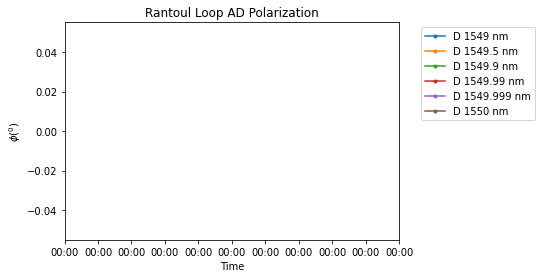

In [156]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549[:num_points][::2])),label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_2[:num_points][::2])),label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_4[:num_points][::2])),label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1549_6[:num_points][::2])),label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],np.degrees(np.arccos(avg_da_d_1549_8[:num_points][::2])),label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2][:-1],np.degrees(np.arccos(avg_da_d_1550[:num_points][::2])),label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ValueError: x and y must have same first dimension, but have shapes (97,) and (96,)

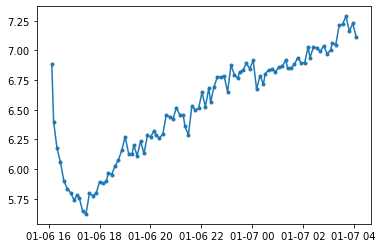

In [125]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_da_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_da_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_da_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_da_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_da_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_da_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi (^0)$")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [39]:
avg_pa_h_1549 = np.mean(np.array(pa_h_1549[:-9]).reshape(-1, 16), axis=1)
avg_pa_h_1549_2 = np.mean(np.array(pa_h_1549_2[:-8]).reshape(-1, 16), axis=1)
avg_pa_h_1549_4 = np.mean(np.array(pa_h_1549_4[:-10]).reshape(-1, 16), axis=1)
avg_pa_h_1549_6 = np.mean(np.array(pa_h_1549_6[:-12]).reshape(-1, 16), axis=1)
avg_pa_h_1549_8 = np.mean(np.array(pa_h_1549_8[:-10]).reshape(-1, 16), axis=1)
avg_pa_h_1550 = np.mean(np.array(pa_h_1550[:-8]).reshape(-1, 16), axis=1)
avg_pa_d_1549 = np.mean(np.array(pa_d_1549[:-10]).reshape(-1, 16), axis=1)
avg_pa_d_1549_2 = np.mean(np.array(pa_d_1549_2[:-9]).reshape(-1, 16), axis=1)
avg_pa_d_1549_4 = np.mean(np.array(pa_d_1549_4[:-9]).reshape(-1, 16), axis=1)
avg_pa_d_1549_6 = np.mean(np.array(pa_d_1549_6[:-10]).reshape(-1, 16), axis=1)
avg_pa_d_1549_8 = np.mean(np.array(pa_d_1549_8[:-9]).reshape(-1, 16), axis=1)
avg_pa_d_1550 = np.mean(np.array(pa_d_1550[:-8]).reshape(-1, 16), axis=1)

ValueError: x and y must have same first dimension, but have shapes (96,) and (97,)

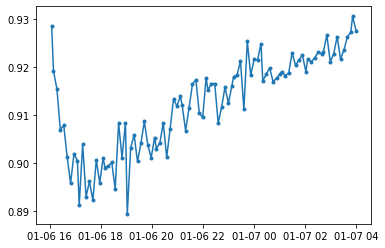

In [158]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_pa_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],avg_pa_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],avg_pa_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_pa_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_pa_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_pa_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pa")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ValueError: x and y must have same first dimension, but have shapes (97,) and (96,)

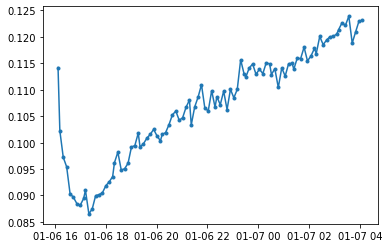

In [159]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_pa_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_pa_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_pa_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_pa_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_pa_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_pa_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pa")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [40]:
avg_pd_h_1549 = np.mean(np.array(pd_h_1549[:-9]).reshape(-1, 16), axis=1)
avg_pd_h_1549_2 = np.mean(np.array(pd_h_1549_2[:-8]).reshape(-1, 16), axis=1)
avg_pd_h_1549_4 = np.mean(np.array(pd_h_1549_4[:-10]).reshape(-1, 16), axis=1)
avg_pd_h_1549_6 = np.mean(np.array(pd_h_1549_6[:-12]).reshape(-1, 16), axis=1)
avg_pd_h_1549_8 = np.mean(np.array(pd_h_1549_8[:-10]).reshape(-1, 16), axis=1)
avg_pd_h_1550 = np.mean(np.array(pd_h_1550[:-8]).reshape(-1, 16), axis=1)
avg_pd_d_1549 = np.mean(np.array(pd_d_1549[:-10]).reshape(-1, 16), axis=1)
avg_pd_d_1549_2 = np.mean(np.array(pd_d_1549_2[:-9]).reshape(-1, 16), axis=1)
avg_pd_d_1549_4 = np.mean(np.array(pd_d_1549_4[:-9]).reshape(-1, 16), axis=1)
avg_pd_d_1549_6 = np.mean(np.array(pd_d_1549_6[:-10]).reshape(-1, 16), axis=1)
avg_pd_d_1549_8 = np.mean(np.array(pd_d_1549_8[:-9]).reshape(-1, 16), axis=1)
avg_pd_d_1550 = np.mean(np.array(pd_d_1550[:-8]).reshape(-1, 16), axis=1)

ValueError: x and y must have same first dimension, but have shapes (96,) and (97,)

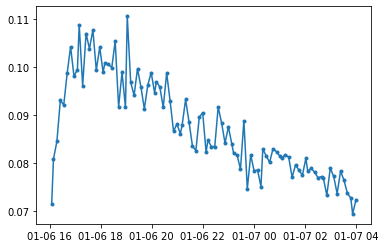

In [161]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_h_1549[::16][:num_points][::2][:-1],avg_pd_h_1549[:num_points][::2],label='H 1549 nm',ls='-',marker='.')
ax.plot(time_h_1549_2[::16][:num_points][::2][:-1],avg_pd_h_1549_2[:num_points][::2],label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_h_1549_4[::16][:num_points][::2],avg_pd_h_1549_4[:num_points][::2],label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_h_1549_6[::16][:num_points][::2][:-1],avg_pd_h_1549_6[:num_points][::2],label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_h_1549_8[::16][:num_points][::2][:-1],avg_pd_h_1549_8[:num_points][::2],label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_h_1550[::16][:num_points][::2][:-1],avg_pd_h_1550[:num_points][::2],label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pd")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ValueError: x and y must have same first dimension, but have shapes (97,) and (96,)

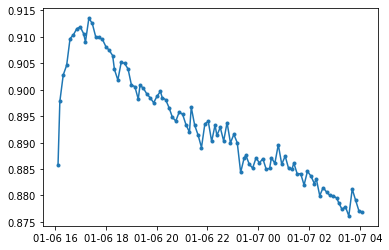

In [162]:
fig, ax = plt.subplots()
num_points = 3000
ax.plot(time_d_1549[::16][:num_points][::2][:-1],avg_pd_d_1549[:num_points][::2],label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][::2],avg_pd_d_1549_2[:num_points][::2],label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][::2],avg_pd_d_1549_4[:num_points][::2],label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][::2],avg_pd_d_1549_6[:num_points][::2],label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][::2],avg_pd_d_1549_8[:num_points][::2],label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][::2],avg_pd_d_1550[:num_points][::2],label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"Pd")
#ax.set_ylim(bottom=1,top=10)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop AD Polarization")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [81]:
theta_h_1549 = []
theta_h_1549_2 = []
theta_h_1549_4 = []
theta_h_1549_6 = []
theta_h_1549_8 = []
theta_h_1550 = []
theta_d_1549 = []
theta_d_1549_2 = []
theta_d_1549_4 = []
theta_d_1549_6 = []
theta_d_1549_8 = []
theta_d_1550 = []

In [82]:
phi_h_1549 = []
phi_h_1549_2 = []
phi_h_1549_4 = []
phi_h_1549_6 = []
phi_h_1549_8 = []
phi_h_1550 = []
phi_d_1549 = []
phi_d_1549_2 = []
phi_d_1549_4 = []
phi_d_1549_6 = []
phi_d_1549_8 = []
phi_d_1550 = []

In [83]:
def fmle(params,*args):
        phh,phv,phd,pha,pvh,pvv,pvd,pva,pdh,pdv,pdd,pda,pah,pav,pad,paa=args
        th,tv = params
        return -(np.log(th**2)*phh
                +np.log(1/2*(th**2))*phd
                 +np.log(1/2*(th**2))*pha
                 +np.log(tv**2)*pvv
                +np.log(1/2*(tv**2))*pvd
                 +np.log(1/2*(tv**2))*pva
                +np.log((1-th**2)*1/2)*pdh
                 +np.log((1-tv**2)*1/2)*pdv
                +np.log(1/2*((1-th**2)*1/2+(1-tv**2)*1/2+np.sqrt((1-th**2)*(1-tv**2))))*pdd
                +np.log((1-th**2)*1/2)*pah
                 +np.log((1-tv**2)*1/2)*pav
                 +np.log(1/2*((1-th**2)*1/2+(1-tv**2)*1/2+np.sqrt((1-th**2)*(1-tv**2))))*paa)
x0=[0.5,0.5]
bounds=((0.1,0.9),(0.1,0.9))
result = minimize(fmle, x0,bounds=((0.1,0.9),(0.1,0.9)),args=(phh,phv,phd,pha,pvh,pvv,pvd,pva,pdh,pdv,pdd,pda,pah,pav,pad,paa))
th=result.x[0]
tv=result.x[1]
print(th**2)
print(tv**2)
def fmlenew(params,*args):
        ph,pv,pd,pa=args
        theta,phi = params
        qh=th**2*np.cos(theta)**2
        qv=tv**2*np.sin(theta)**2
        qd=1/2*((1-th**2)*np.cos(theta)**2+(1-tv**2)*np.sin(theta)**2+np.sqrt((1-th**2)*(1-tv**2))*np.sin(2*theta)*np.cos(phi))
        qa=1/2*((1-th**2)*np.cos(theta)**2+(1-tv**2)*np.sin(theta)**2-np.sqrt((1-th**2)*(1-tv**2))*np.sin(2*theta)*np.cos(phi))
        return -(qh/(qh+qv))**ph*(qv/(qh+qv))**pv*(qd/(qa+qd))**pd*(qa/(qa+qd))**pa

0.6392730481193559
0.3896246965220901


In [84]:
for i in range(len(avg_vh_h_1549)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549[i]+1),1-1/(avg_vh_h_1549[i]+1),avg_pd_h_1549[i],avg_pa_h_1549[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549.append(result.x[0]*(180/(np.pi)))
    phi_h_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_2[i]+1),1-1/(avg_vh_h_1549_2[i]+1),avg_pd_h_1549_2[i],avg_pa_h_1549_2[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_4)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_4[i]+1),1-1/(avg_vh_h_1549_4[i]+1),avg_pd_h_1549_4[i],avg_pa_h_1549_4[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_6)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_6[i]+1),1-1/(avg_vh_h_1549_6[i]+1),avg_pd_h_1549_6[i],avg_pa_h_1549_6[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1549_8)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1549_8[i]+1),1-1/(avg_vh_h_1549_8[i]+1),avg_pd_h_1549_8[i],avg_pa_h_1549_8[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_h_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_h_1550)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_h_1550[i]+1),1-1/(avg_vh_h_1550[i]+1),avg_pd_h_1550[i],avg_pa_h_1550[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_h_1550.append(result.x[0]*(180/(np.pi)))
    phi_h_1550.append(result.x[1]*(180/(np.pi)))

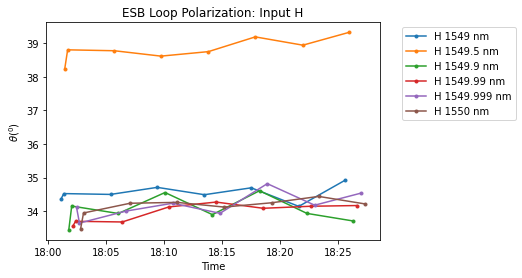

In [85]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points],theta_h_1549,label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points],theta_h_1549_2,label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points],theta_h_1549_4,label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points],theta_h_1549_6,label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points],theta_h_1549_8,label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points],theta_h_1550,label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("ESB Loop Polarization: Input H")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

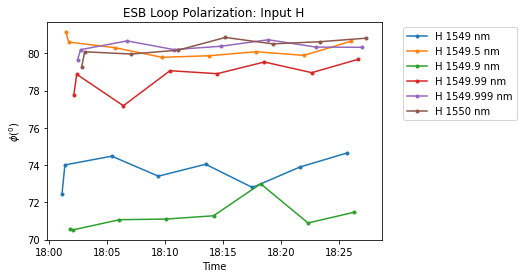

In [86]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points],phi_h_1549,label='H 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points],phi_h_1549_2,label='H 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points],phi_h_1549_4,label='H 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points],phi_h_1549_6,label='H 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points],phi_h_1549_8,label='H 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points],phi_h_1550,label='H 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("ESB Loop Polarization: Input H")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

In [87]:
for i in range(len(avg_vh_d_1549)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549[i]+1),1-1/(avg_vh_d_1549[i]+1),avg_pd_d_1549[i],avg_pa_d_1549[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549.append(result.x[0]*(180/(np.pi)))
    phi_d_1549.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_2[i]+1),1-1/(avg_vh_d_1549_2[i]+1),avg_pd_d_1549_2[i],avg_pa_d_1549_2[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_2.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_2.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_4)):
    x0=[np.pi,np.pi]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_4[i]+1),1-1/(avg_vh_d_1549_4[i]+1),avg_pd_d_1549_4[i],avg_pa_d_1549_4[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_4.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_4.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_6)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_6[i]+1),1-1/(avg_vh_d_1549_6[i]+1),avg_pd_d_1549_6[i],avg_pa_d_1549_6[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_6.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_6.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1549_8)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1549_8[i]+1),1-1/(avg_vh_d_1549_8[i]+1),avg_pd_d_1549_8[i],avg_pa_d_1549_8[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1549_8.append(result.x[0]*(180/(np.pi)))
    phi_d_1549_8.append(result.x[1]*(180/(np.pi)))
for i in range(len(avg_vh_d_1550)):
    x0=[1,1]
    result = minimize(fmlenew, x0,args=(1/(avg_vh_d_1550[i]+1),1-1/(avg_vh_d_1550[i]+1),avg_pd_d_1550[i],avg_pa_d_1550[i]),bounds=[(0,2*np.pi),(0,np.pi)])
    theta_d_1550.append(result.x[0]*(180/(np.pi)))
    phi_d_1550.append(result.x[1]*(180/(np.pi)))

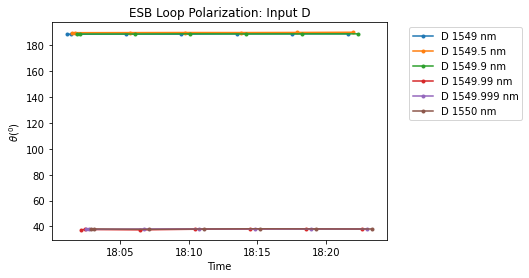

In [101]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],theta_d_1549,label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],theta_d_1549_2,label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],theta_d_1549_4,label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],theta_d_1549_6,label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],theta_d_1549_8,label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],theta_d_1550,label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\theta (^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
#plt.ylim((35,40))
plt.title("ESB Loop Polarization: Input D")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

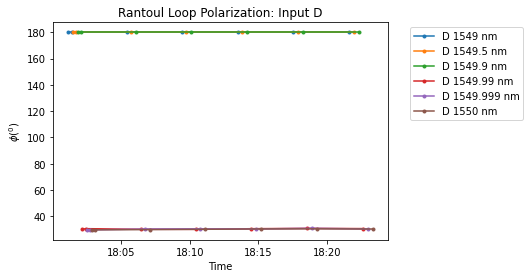

In [89]:
fig, ax = plt.subplots()
num_points = 30000
ax.plot(time_d_1549[::16][:num_points][:-1],phi_d_1549,label='D 1549 nm',ls='-',marker='.')
ax.plot(time_d_1549_2[::16][:num_points][:-1],phi_d_1549_2,label='D 1549.5 nm',ls='-',marker='.')
ax.plot(time_d_1549_4[::16][:num_points][:-1],phi_d_1549_4,label='D 1549.9 nm',ls='-',marker='.')
ax.plot(time_d_1549_6[::16][:num_points][:-1],phi_d_1549_6,label='D 1549.99 nm',ls='-',marker='.')
ax.plot(time_d_1549_8[::16][:num_points][:-1],phi_d_1549_8,label='D 1549.999 nm',ls='-',marker='.')
ax.plot(time_d_1550[::16][:num_points][:-1],phi_d_1550,label='D 1550 nm',ls='-',marker='.')
#ax2.plot(temp_times,temp_20222211,color="orange")
#plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel(r"$\phi(^0)$")
#ax.set_ylim(bottom=50,top=90)
#ax2.set_ylabel("Temperature (F)")
plt.xlabel("Time")
plt.title("Rantoul Loop Polarization: Input D")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
#plt.savefig('vh_drift_20221214.pdf')

In [78]:
x=[0.5,0.5]
result = minimize(fmlenew, x0,args=(0,1,0,0))
print(result.x[0])
print(result.x[1])

7.09487416885278e-09
1.0


In [79]:
np.degrees(7.09487416885278e-09)

4.065063460516521e-07

In [98]:
for i in range(len(avg_pd_d_1549)):
    print(avg_pd_d_1549[i],avg_pa_d_1549[i])

0.9253954831184025 0.07460451688159753
0.9259762756754559 0.074023724324544
0.925627593122451 0.07437240687754901
0.9235028913090162 0.0764971086909838
0.922413645077288 0.07758635492271204
0.9226001066500591 0.07739989334994098
0.9206860047583016 0.07931399524169833


In [91]:
1/(avg_vh_d_1549[0]+1),1-1/(avg_vh_d_1549[0]+1)

(0.7391979220675289, 0.2608020779324711)

In [92]:
x=[0.5,0.5]
result = minimize(fmlenew, x0,args=(0.7391979220675289, 0.2608020779324711,0.9253954831184025, 0.07460451688159753))
print(result.x[0])
print(result.x[1])

0.6504049436141849
0.5532194918546641


In [96]:
np.degrees(0.6504049436141849)

37.265458243537076

In [97]:
np.degrees(0.5532194918546641)

31.69714202764428